In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
## Drop month, day and yyear
df = df.drop(['month', 'day', 'year'], axis=1)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [10]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [11]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [12]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [13]:
X= df.drop('FWI', axis=1)
y = df['FWI']

In [14]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [15]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [16]:
## Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [18]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


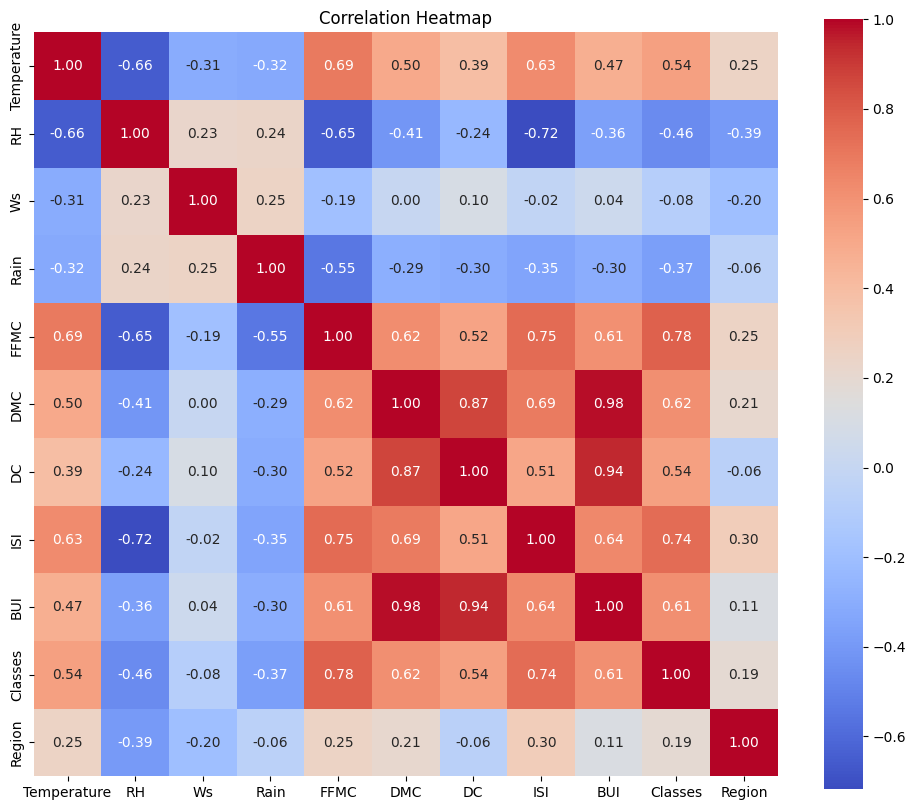

In [19]:
## Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

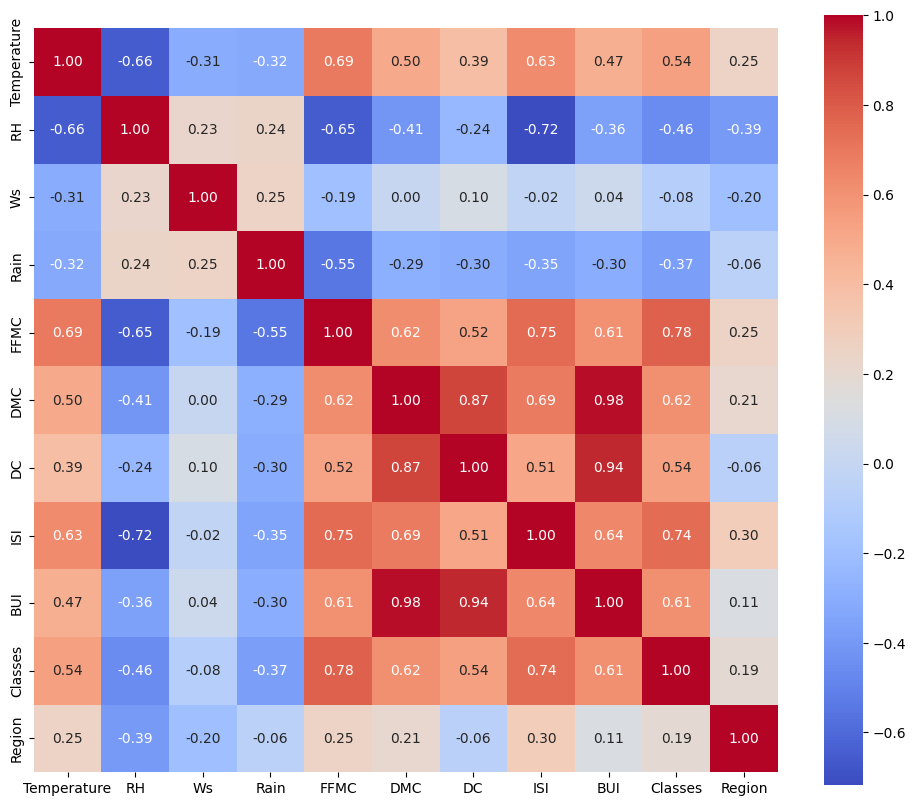

In [20]:
## Check for multicollinearity
plt.figure(figsize=(12, 10))
corr = X_train.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)

In [21]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # We are interested in absolute correlation
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [22]:
corr_features = correlation(X_train, 0.8)
print("Correlated features with a threshold of 0.8:")
print(corr_features)

Correlated features with a threshold of 0.8:
{'DC', 'BUI'}


In [23]:
## Drop highly correlated features
X_train = X_train.drop(columns=corr_features)
X_test = X_test.drop(columns=corr_features)
print("Shape of X_train after dropping correlated features:", X_train.shape)
print("Shape of X_test after dropping correlated features:", X_test.shape)

Shape of X_train after dropping correlated features: (182, 9)
Shape of X_test after dropping correlated features: (61, 9)


## Feature Scaling Or Standardization

In [24]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Box Plots to Understand Effect Of Standar Scales

C:\Users\romol\AppData\Local\Temp\ipykernel_25292\3095257881.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


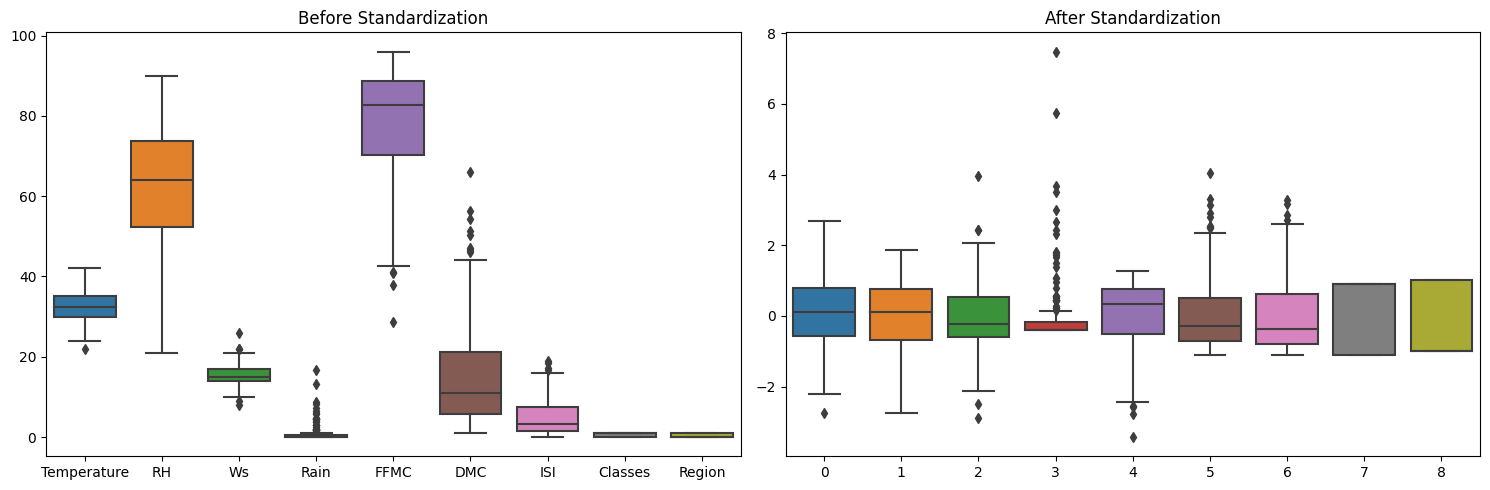

In [26]:
## boxplot to understand effect of standardization
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train, orient='v')
plt.title('Before Standardization')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled, orient='v')
plt.title('After Standardization')
plt.tight_layout()
plt.show()


## Linear Regression

Linear Regression Mean Absolute Error: 0.5468236465249978
Linear Regression R^2 Score: 0.9847657384266951


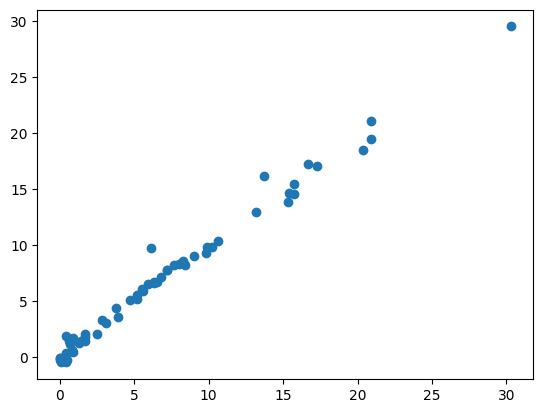

In [27]:
# Linear Regression
from sklearn.linear_model import LinearRegression
## metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred_test = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred_test)
score = r2_score(y_test, y_pred_test)
print("Linear Regression Mean Absolute Error:", mae)
print("Linear Regression R^2 Score:", score)
plt.scatter(y_test, y_pred_test)

## Lasso Regression

Lasso Regression Mean Absolute Error: 1.133175994914409
Lasso Regression R^2 Score: 0.9492020263112388


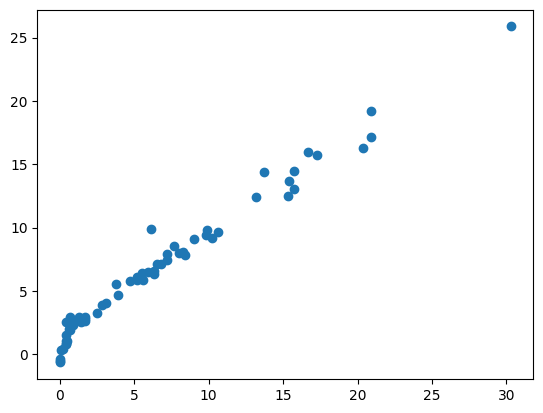

In [28]:
## Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred_test_lasso = lasso.predict(X_test_scaled)
mae_lasso = mean_absolute_error(y_test, y_pred_test_lasso)
score_lasso = r2_score(y_test, y_pred_test_lasso)
print("Lasso Regression Mean Absolute Error:", mae_lasso)
print("Lasso Regression R^2 Score:", score_lasso)
plt.scatter(y_test, y_pred_test_lasso)

## Cross Validation Lasso

In [29]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [30]:
lasso_cv.alpha_

0.05725391318234408

In [31]:
lasso_cv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [32]:
lasso_cv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

LassoCV Mean Absolute Error: 0.619970115826343
LassoCV R^2 Score: 0.9820946715928275


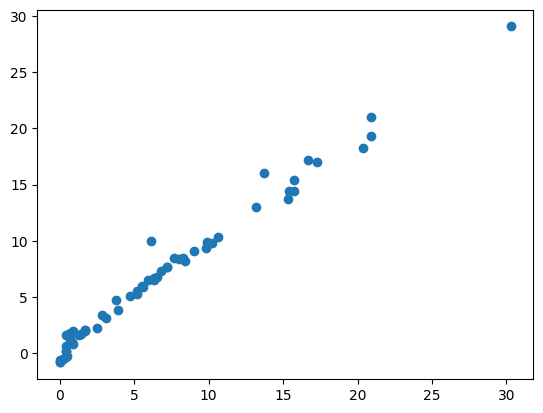

In [33]:
y_pred = lasso_cv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae_lasso_cv = mean_absolute_error(y_test, y_pred)
score_lasso_cv = r2_score(y_test, y_pred)
print("LassoCV Mean Absolute Error:", mae_lasso_cv)
print("LassoCV R^2 Score:", score_lasso_cv)

## Ridge Regesssion Model

Ridge Regression Mean Absolute Error: 0.5642305340105715
Ridge Regression R^2 Score: 0.9842993364555512


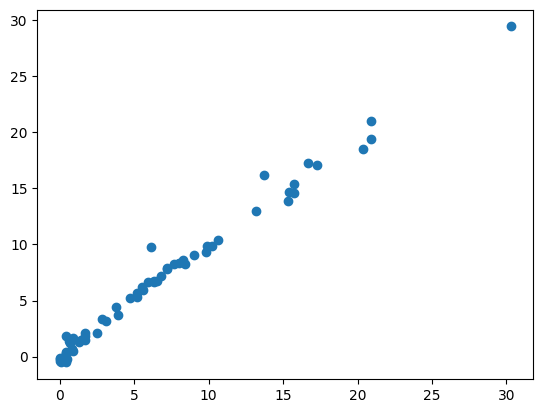

In [34]:
## Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred_test_ridge = ridge.predict(X_test_scaled)
mae_ridge = mean_absolute_error(y_test, y_pred_test_ridge)
score_ridge = r2_score(y_test, y_pred_test_ridge)
print("Ridge Regression Mean Absolute Error:", mae_ridge)
print("Ridge Regression R^2 Score:", score_ridge)
plt.scatter(y_test, y_pred_test_ridge)

RidgeCV Mean Absolute Error: 0.5642305340105715
RidgeCV R^2 Score: 0.9842993364555512


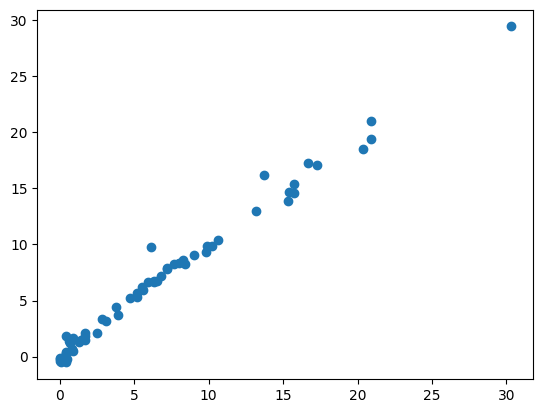

In [37]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train_scaled, y_train)
y_pred_ridge_cv = ridge_cv.predict(X_test_scaled)
plt.scatter(y_test, y_pred_ridge_cv)
mae_ridge_cv = mean_absolute_error(y_test, y_pred_ridge_cv)
score_ridge_cv = r2_score(y_test, y_pred_ridge_cv)
print("RidgeCV Mean Absolute Error:", mae_ridge_cv)
print("RidgeCV R^2 Score:", score_ridge_cv)


In [38]:
ridge_cv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## ElasticNet Regression

ElasticNet Regression Mean Absolute Error: 1.8822353634896005
ElasticNet Regression R^2 Score: 0.8753460589519703


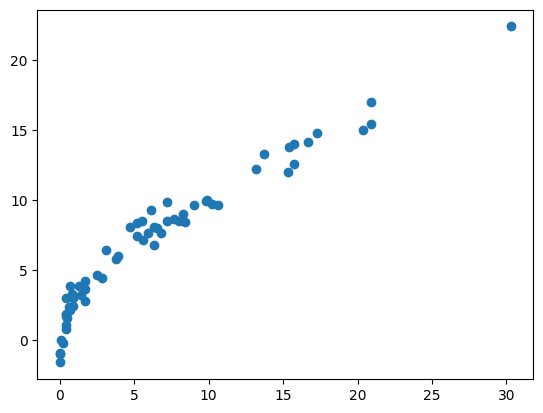

In [39]:
## Elasticnet Regression
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled, y_train)
y_pred_test_en = elasticnet.predict(X_test_scaled)
mae_en = mean_absolute_error(y_test, y_pred_test_en)
score_en = r2_score(y_test, y_pred_test_en)
print("ElasticNet Regression Mean Absolute Error:", mae_en)
print("ElasticNet Regression R^2 Score:", score_en)
plt.scatter(y_test, y_pred_test_en)


ElasticNetCV Mean Absolute Error: 0.6575946731430898
ElasticNetCV R^2 Score: 0.9814217587854941


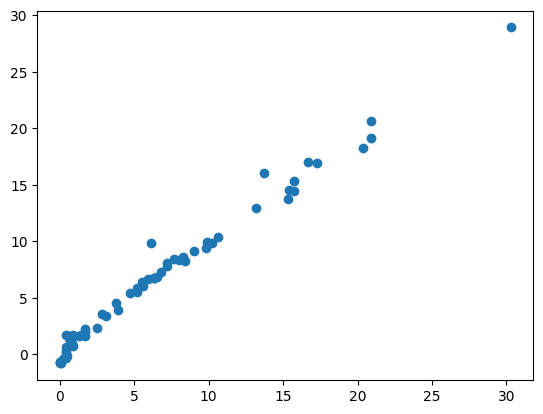

In [41]:
## ElasticNetCV
from sklearn.linear_model import ElasticNetCV
elasticnet_cv = ElasticNetCV(cv=5)
elasticnet_cv.fit(X_train_scaled, y_train)
y_pred_en_cv = elasticnet_cv.predict(X_test_scaled)
plt.scatter(y_test, y_pred_en_cv)
mae_en_cv = mean_absolute_error(y_test, y_pred_en_cv)
score_en_cv = r2_score(y_test, y_pred_en_cv)
print("ElasticNetCV Mean Absolute Error:", mae_en_cv)
print("ElasticNetCV R^2 Score:", score_en_cv)


In [42]:
elasticnet_cv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [43]:
## Pickle the Machine learning models, preprocessors and scalers
import pickle

In [44]:
scaler

StandardScaler()

In [45]:
ridge

Ridge()

In [46]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge_model.pkl', 'wb'))